# Statistical visualization with Seaborn

In the previous notebook, you saw how to operate on Matplotlib objects. This serves as an important foundation. But now, I am going to show you a short-cut that will allow you to create elegant and rather complex visualizations of statistical quantities, without having to operate at that low level. This is the Seaborn visualization library. It builds upon the Matplotlib basis to create rich statistical visualizations of the kind that you will want to use when comparing quantities, or characterizing quantitative data.

Incidentally, Seaborn was also started by a neuroscientist, Michael Waskom, who created the tool originally as a way to formalize the kinds of visualizations that he was creating in his own research and so that he could reuse them himself. But, thanks to the elegance of the visualizations that the library creates, the broad utility of these visualization methods, and the easy-to-use API that utilizes the data munging capabilities of Pandas `DataFrame` objects, providing just enough flexibility, the library gained a very large user base, and it is now one of the most popular data science tools in any programming language.

Let's import it and start using it:

In [1]:
import seaborn as sns

We'll use the ABIDE dataset again:


In [2]:
import pandas as pd
abide = pd.read_csv('/home/jovyan/data/abide2.tsv', sep='\t')

Let's start by reproducing a plot we created before. As you can see, the syntax is quite different. The data is provided as the full `DataFrame` object, and variables/columns are extracted by passing them as  axes key-word arguments. 

<AxesSubplot:xlabel='fsArea_L_V1_ROI', ylabel='fsArea_R_V1_ROI'>

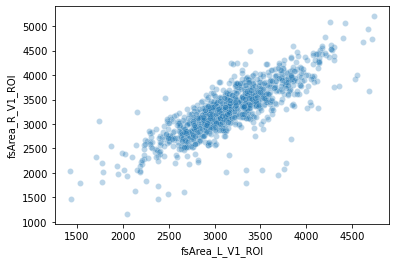

In [3]:
sns.scatterplot(data=abide, x="fsArea_L_V1_ROI", y="fsArea_R_V1_ROI", alpha=0.3)

This is not all that different from what we saw before, but with a different function, and just a bit more information, we can create a much more elaborate visualization that provides a lot of information about the relationships in the data, including a fit to a linear model:

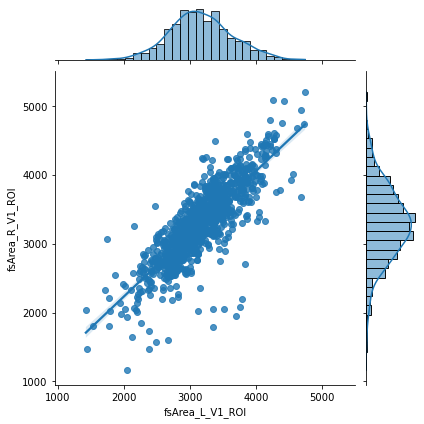

In [4]:
sns.jointplot(data=abide, x="fsArea_L_V1_ROI", y="fsArea_R_V1_ROI", kind="reg", 
              xlim=(950, 5500), ylim=(950, 5500))

Another example of this is the pairplot, that compares a collection of variables. For example, let's select the 4 variables that characterize left V1 and compare them to each other:

In [5]:
l_v1 = abide.filter(regex="\w_L_V1")

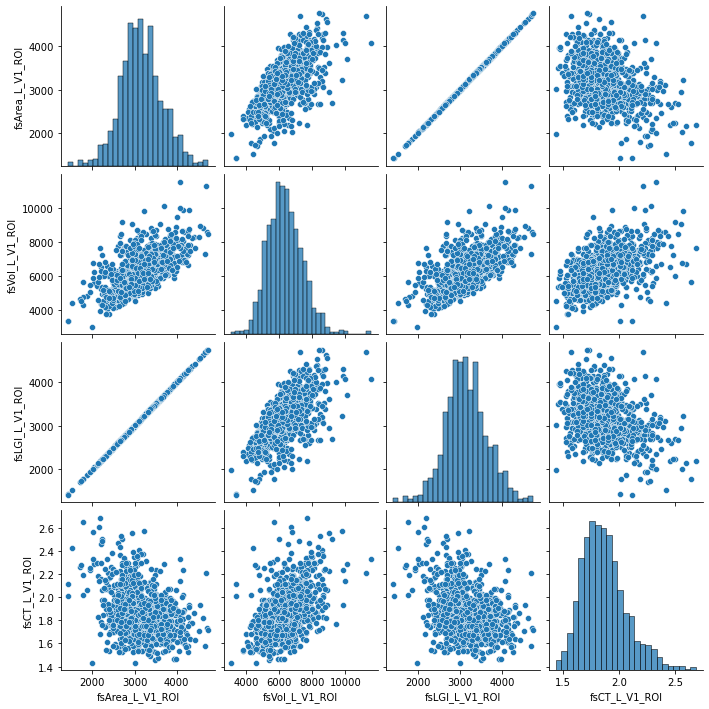

In [6]:
sns.pairplot(data=l_v1)

And so on... there are a plethora of examples in Seaborn's [example gallery](https://seaborn.pydata.org/examples/index.html)

## Tidy data, in long format

This all seems rather good, but there is one important caveat to all this. Seaborn really works best only if the data are organized in a long tidy format. What does that mean? The idea of "tidy data" comes from a [paper by that name](https://vita.had.co.nz/papers/tidy-data.pdf) by Hadley Wickham. The main idea is that each row should represent an observation and each column should represent a variable. Our representation of the ABIDE data, for example, conforms nicely with this notion. However, Seaborn really works best when the tidy data that you have are also organized in what is known as the "long format". In this format, variables that contain similar measurements should all be grouped together into columns. For example, in the ABIDE data case, this form would require that all of ROI area columns be combined into one "area" column, all of the GI columns be combined into one GI column, and so on, and then there would also be a column that records the ROI to which each measurement belongs. When data is organized in this way, it is much more amenable to representation in Seaborn.

Let's see what we can do to move our data into long format. Let's focus on the left V1 again. We will add an identifier column, putting back the subject study ID into the `DataFrame`:

In [15]:
l_v1["subject"] = abide["subject"]

<ipython-input-15-60d164f69ade>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  l_v1["subject"] = abide["subject"]


In [18]:
long_l_v1 = l_v1.melt(id_vars=["subject"])

In [24]:
long_l_v1

,subject,variable,value
0,29293,fsArea_L_V1_ROI,2750.000
1,28997,fsArea_L_V1_ROI,2836.000
2,28845,fsArea_L_V1_ROI,3394.000
3,29210,fsArea_L_V1_ROI,3382.000
4,29894,fsArea_L_V1_ROI,3080.000
...,...,...,...
4011,29570,fsCT_L_V1_ROI,1.674
4012,29233,fsCT_L_V1_ROI,1.785
4013,28862,fsCT_L_V1_ROI,1.713
4014,29312,fsCT_L_V1_ROI,1.928


<AxesSubplot:xlabel='value', ylabel='variable'>

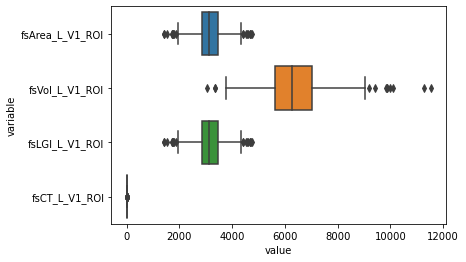

In [27]:
sns.boxplot(data=long_l_v1, x="value", y="variable")